 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_df = pd.read_csv("../Starter_Code/Resources/whale_returns.csv", index_col="Date",infer_datetime_format=True, parse_dates=True)
whale_df = whale_df.sort_index()
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_df = whale_df.dropna()

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_df = pd.read_csv("../Starter_Code/Resources/algo_returns.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_df = algo_df.sort_index()
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_df = algo_df.dropna()
algo_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_df = pd.read_csv("../Starter_Code/Resources/sp500_history.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_df = sp500_df.sort_index()
sp500_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
sp500_df.dtypes

Close    object
dtype: object

In [10]:
sp500_df['Close'] = sp500_df["Close"].str.replace("$","")
sp500_df.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [11]:
# Fix Data Types 
sp500_df['Close'] = sp500_df['Close'].astype('float')
sp500_df.head()


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [12]:
# Calculate Daily Returns
daily_return = sp500_df.pct_change()

In [13]:
# Drop nulls
daily_return = daily_return.dropna()

In [14]:
daily_return

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [15]:
# Rename `Close` Column to be specific to this portfolio.
daily_return = daily_return.rename(columns={"Close":"S&P 500 Returns"})
daily_return.head()

,S&P 500 Returns
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
data_df = pd.concat([whale_df,algo_df,daily_return], axis='columns', join='inner')
data_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

In [17]:
data_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


In [18]:
data_df.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Returns
Date,,,,,,,
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841


# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: xlabel='Date'>

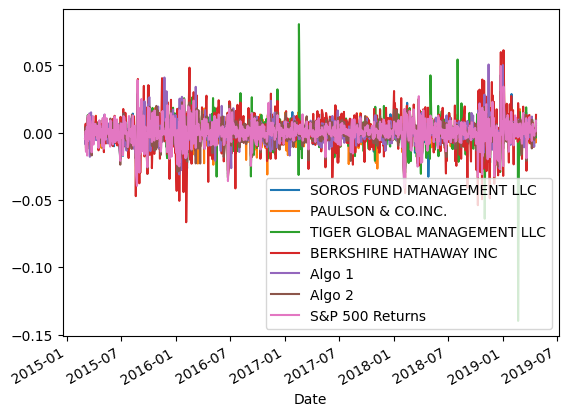

In [19]:
# Plot daily returns of all portfolios
data_df.plot()

#### Calculate and Plot cumulative returns.

<Axes: xlabel='Date'>

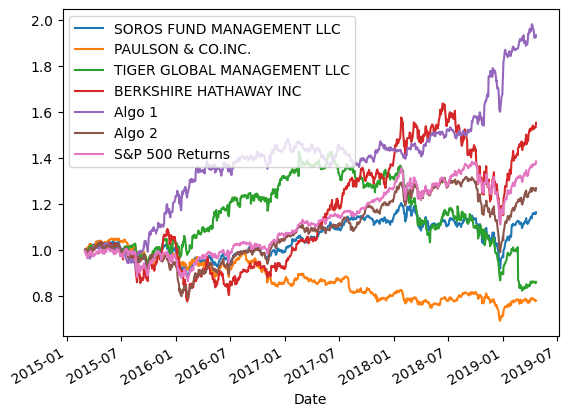

In [20]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1+ data_df).cumprod()
# Plot cumulative returns
cumulative_returns.plot()


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: >

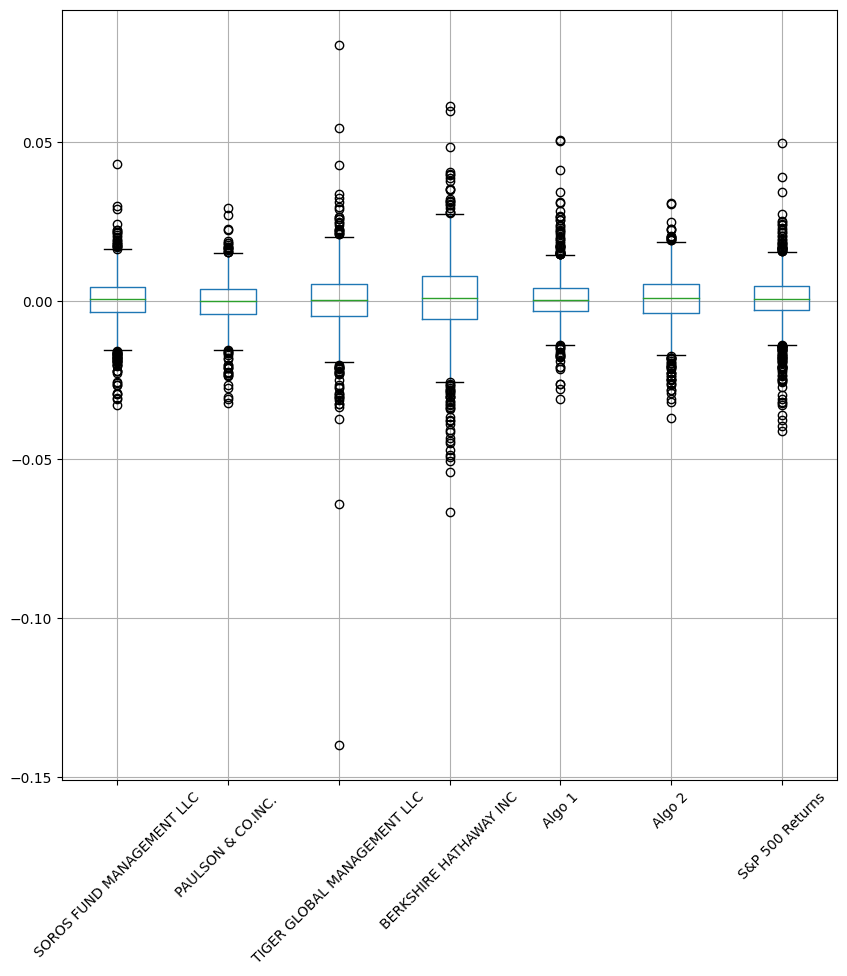

In [21]:
# Box plot to visually show risk
data_df.boxplot(rot=45,figsize=(10,10))

### Calculate Standard Deviations

In [22]:
# Calculate the daily standard deviations of all portfolios
daily_std = data_df.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500 Returns                0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [23]:
# Calculate  the daily standard deviation of S&P 500
data_df.std() > data_df['S&P 500 Returns'].std()
# Determine which portfolios are riskier than the S&P 500
#Berkshire, Tiger

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500 Returns                False
dtype: bool

### Calculate the Annualized Standard Deviation

In [24]:
# Calculate the annualized standard deviation (252 trading days)
annual_std = daily_std * np.sqrt(252)
annual_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500 Returns                0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: xlabel='Date'>

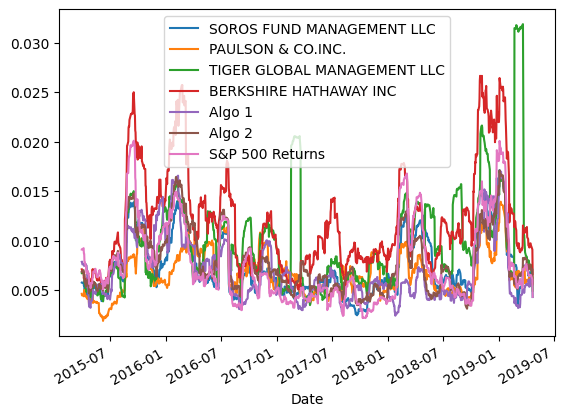

In [25]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_21_std = data_df.rolling(window=21).std()
# Plot the rolling standard deviation

rolling_21_std.plot()

### Calculate and plot the correlation

<Axes: >

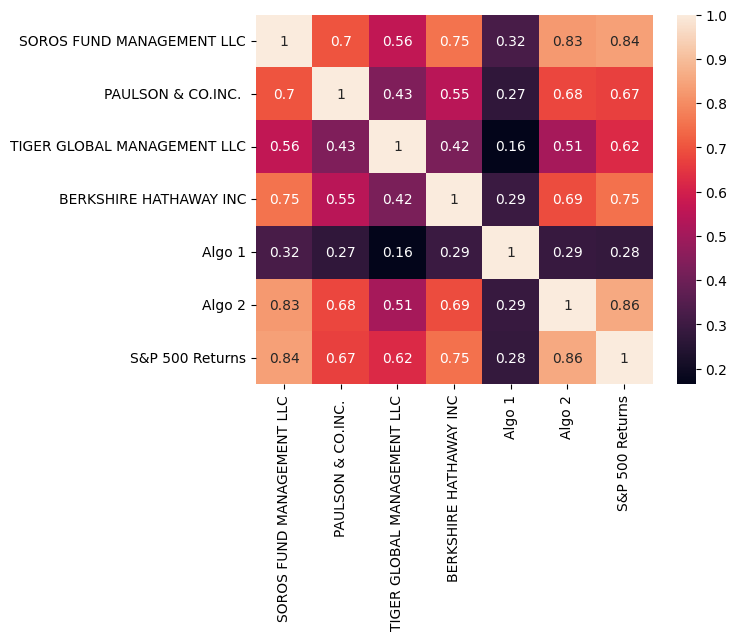

In [26]:
# Calculate the correlation
coorelation = data_df.corr()

# Display de correlation matrix
sns.heatmap(coorelation, annot=True)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<Axes: xlabel='Date'>

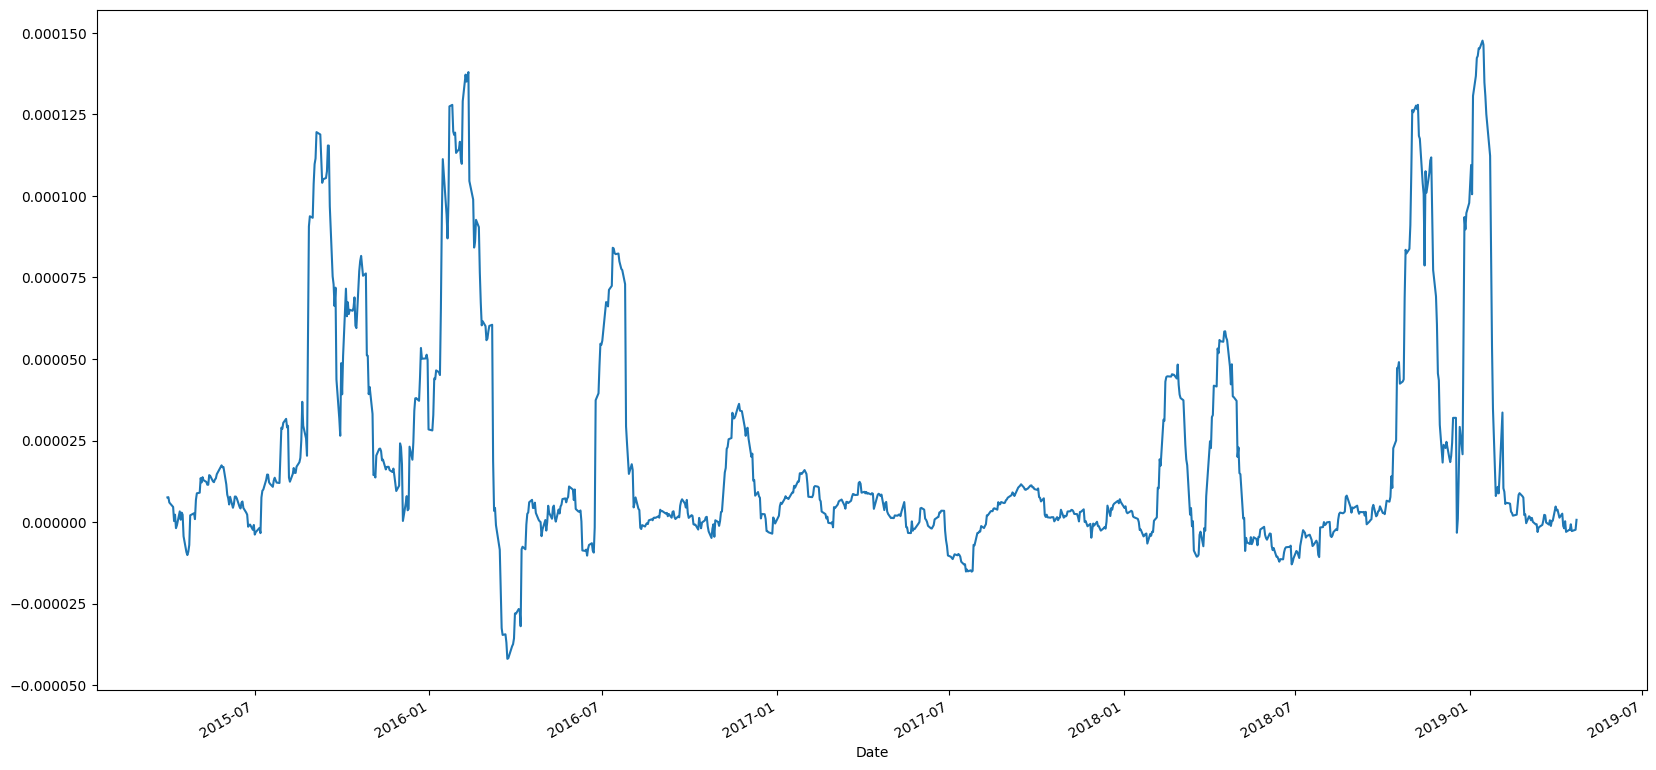

In [27]:
# Calculate covariance of a single portfolio
covariance = data_df['Algo 1'].cov(data_df['S&P 500 Returns'])
# Calculate variance of S&P 500
variance = data_df['S&P 500 Returns'].var()
# Computing beta
beta = covariance / variance 
# Plot beta trend
rolling_covariance = data_df['Algo 1'].rolling(window=21).cov(data_df['S&P 500 Returns'])

rolling_covariance.plot(figsize=(20,10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<Axes: xlabel='Date'>

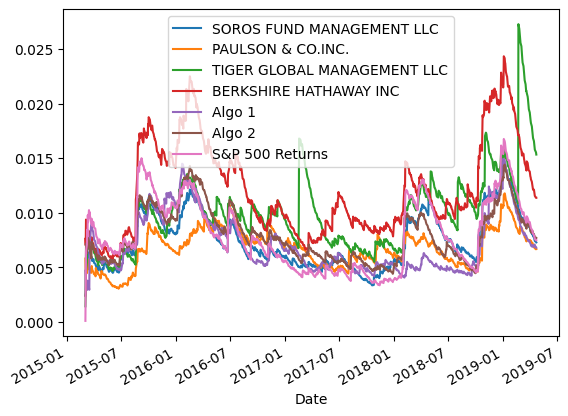

In [28]:
# Use `ewm` to calculate the rolling window
exponential_rolling = data_df.ewm(halflife=21).std()
exponential_rolling.plot()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [29]:
# Annualized Sharpe Ratios
annual_sharpe = (data_df.mean() * 252) / (data_df.std() * np.sqrt(252))

<Axes: >

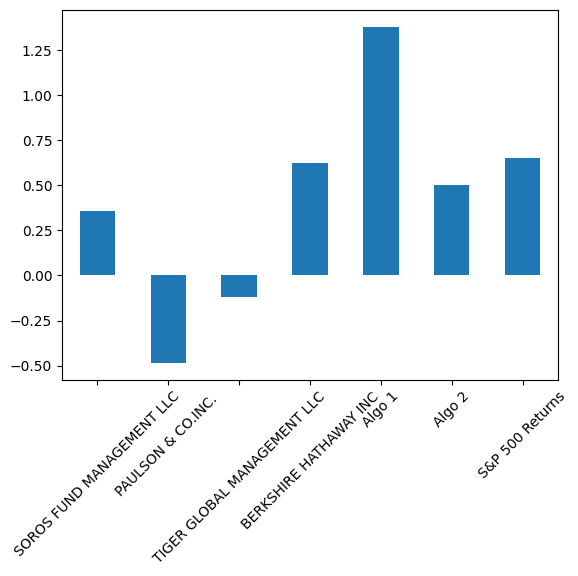

In [30]:
# Visualize the sharpe ratios as a bar plot
annual_sharpe.plot(kind='bar',rot=45)

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [31]:
# Reading data from 1st stock
vfv_df = pd.read_csv("../Starter_Code/Resources/VFV_closing_data_resource - Sheet1.csv",index_col="Date", infer_datetime_format=True, parse_dates=True)
vfv_df = vfv_df.sort_index()
vfv_df.head()

,Close
Date,
2015-03-03 16:00:00,46.82
2015-03-04 16:00:00,46.38
2015-03-05 16:00:00,46.81
2015-03-06 16:00:00,46.51
2015-03-09 16:00:00,46.65


In [32]:
# Reading data from 2nd stock
vug_df = pd.read_csv("../Starter_Code/Resources/VUG_closing_data_resource - Sheet1.csv",index_col="Date", infer_datetime_format=True, parse_dates=True)
vug_df = vug_df.sort_index()
vug_df.head()

,Close
Date,
2015-03-03 16:00:00,109.72
2015-03-04 16:00:00,109.28
2015-03-05 16:00:00,109.42
2015-03-06 16:00:00,107.94
2015-03-09 16:00:00,108.29


In [33]:
# Reading data from 3rd stock
vym_df = pd.read_csv("../Starter_Code/Resources/VYM_closing_data_resource - Sheet1.csv",index_col="Date", infer_datetime_format=True, parse_dates=True)
vym_df = vym_df.sort_index()
vym_df.head()

,Close
Date,
2015-03-03 16:00:00,70.01
2015-03-04 16:00:00,69.65
2015-03-05 16:00:00,69.52
2015-03-06 16:00:00,68.56
2015-03-09 16:00:00,68.82


In [34]:
# Combine all stocks in a single DataFrame
vanguard_data = pd.concat([vfv_df,vug_df,vym_df], axis='columns', join='inner')
vanguard_data.head()

,Close,Close,Close
Date,,,
2015-03-03 16:00:00,46.82,109.72,70.01
2015-03-04 16:00:00,46.38,109.28,69.65
2015-03-05 16:00:00,46.81,109.42,69.52
2015-03-06 16:00:00,46.51,107.94,68.56
2015-03-09 16:00:00,46.65,108.29,68.82


In [35]:
# Reset Date index


In [36]:
# Reorganize portfolio data by having a column per symbol
vanguard_data.columns = ['VFV', 'VUG', 'VYM']
vanguard_data.head()

,VFV,VUG,VYM
Date,,,
2015-03-03 16:00:00,46.82,109.72,70.01
2015-03-04 16:00:00,46.38,109.28,69.65
2015-03-05 16:00:00,46.81,109.42,69.52
2015-03-06 16:00:00,46.51,107.94,68.56
2015-03-09 16:00:00,46.65,108.29,68.82


In [37]:
vanguard_data.head()

,VFV,VUG,VYM
Date,,,
2015-03-03 16:00:00,46.82,109.72,70.01
2015-03-04 16:00:00,46.38,109.28,69.65
2015-03-05 16:00:00,46.81,109.42,69.52
2015-03-06 16:00:00,46.51,107.94,68.56
2015-03-09 16:00:00,46.65,108.29,68.82


In [38]:
# Calculate daily returns
vanguard_daily_returns = vanguard_data.pct_change()

# Drop NAs
vanguard_daily_returns = vanguard_daily_returns.dropna()
vanguard_daily_returns.columns = ['VFV', 'VUG', 'VYM']
# Display sample data
vanguard_daily_returns.head()

,VFV,VUG,VYM
Date,,,
2015-03-04 16:00:00,-0.009398,-0.004010,-0.005142
2015-03-05 16:00:00,0.009271,0.001281,-0.001866
2015-03-06 16:00:00,-0.006409,-0.013526,-0.013809
2015-03-09 16:00:00,0.003010,0.003243,0.003792
2015-03-10 16:00:00,-0.009861,-0.015606,-0.014967


In [39]:
vanguard_daily_returns = vanguard_daily_returns.reset_index()
vanguard_daily_returns

,Date,VFV,VUG,VYM
0,2015-03-04 16:00:00,-0.009398,-0.004010,-0.005142
1,2015-03-05 16:00:00,0.009271,0.001281,-0.001866
2,2015-03-06 16:00:00,-0.006409,-0.013526,-0.013809
3,2015-03-09 16:00:00,0.003010,0.003243,0.003792
4,2015-03-10 16:00:00,-0.009861,-0.015606,-0.014967
...,...,...,...,...
1007,2019-04-16 16:00:00,-0.000290,-0.000992,0.005031
1008,2019-04-17 16:00:00,-0.003481,-0.002915,-0.000683
1009,2019-04-18 16:00:00,0.004221,0.002924,-0.001822
1010,2019-04-22 16:00:00,-0.001159,0.002667,-0.000913


In [40]:
vanguard_daily_returns['Date'] = pd.to_datetime(vanguard_daily_returns['Date']).dt.date
vanguard_daily_returns = vanguard_daily_returns.set_index('Date')
vanguard_daily_returns

,VFV,VUG,VYM
Date,,,
2015-03-04,-0.009398,-0.004010,-0.005142
2015-03-05,0.009271,0.001281,-0.001866
2015-03-06,-0.006409,-0.013526,-0.013809
2015-03-09,0.003010,0.003243,0.003792
2015-03-10,-0.009861,-0.015606,-0.014967
...,...,...,...
2019-04-16,-0.000290,-0.000992,0.005031
2019-04-17,-0.003481,-0.002915,-0.000683
2019-04-18,0.004221,0.002924,-0.001822


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [41]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
vanguard_portfolio_returns = vanguard_daily_returns.dot(weights)
# Display sample data
vanguard_portfolio_returns.head()

Date
2015-03-04   -0.006183
2015-03-05    0.002895
2015-03-06   -0.011248
2015-03-09    0.003348
2015-03-10   -0.013478
dtype: float64

<Axes: xlabel='Date'>

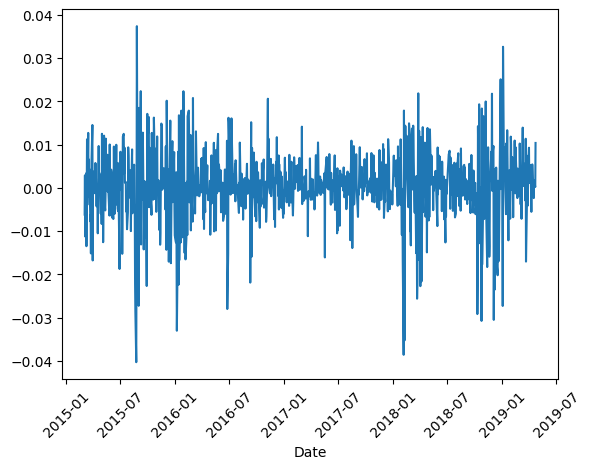

In [42]:
vanguard_portfolio_returns.plot(rot=45)

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [43]:
# Join your returns DataFrame to the original returns DataFrame
data_df['Custom'] = vanguard_portfolio_returns
data_df.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Returns,Custom
Date,,,,,,,,
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.001250
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,-0.002360
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.001774
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.000198
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841,0.010369


In [44]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
data_df = data_df.dropna()
data_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P 500 Returns                0
Custom                         0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [45]:
# Calculate the annualized `std`
custom_annual_std = data_df.std() * np.sqrt(252) 
custom_annual_std

SOROS FUND MANAGEMENT LLC      0.124517
PAULSON & CO.INC.              0.111258
TIGER GLOBAL MANAGEMENT LLC    0.173267
BERKSHIRE HATHAWAY INC         0.203857
Algo 1                         0.120977
Algo 2                         0.132424
S&P 500 Returns                0.134293
Custom                         0.126393
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<Axes: xlabel='Date'>

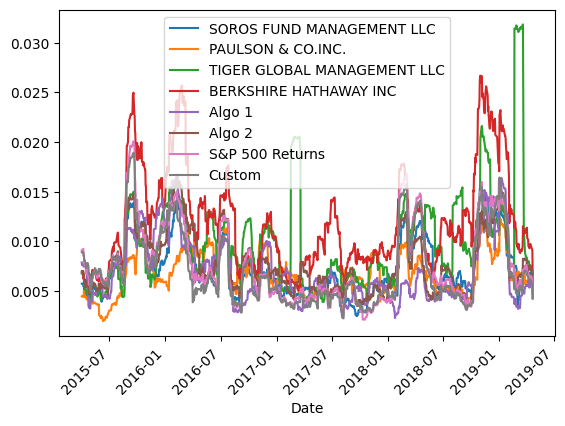

In [48]:
# Calculate rolling standard deviation
custom_rolling_std = data_df.rolling(window=21).std() 

# Plot rolling standard deviation
custom_rolling_std.plot(rot=45)

### Calculate and plot the correlation

<Axes: >

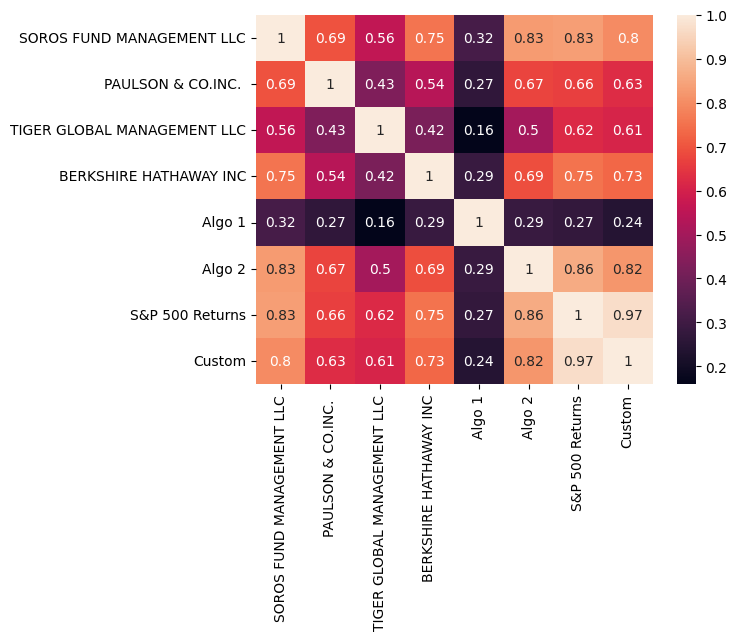

In [50]:
# Calculate and plot the correlation
custom_correlation = data_df.corr()

sns.heatmap(custom_correlation, annot=True)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<Axes: xlabel='Date'>

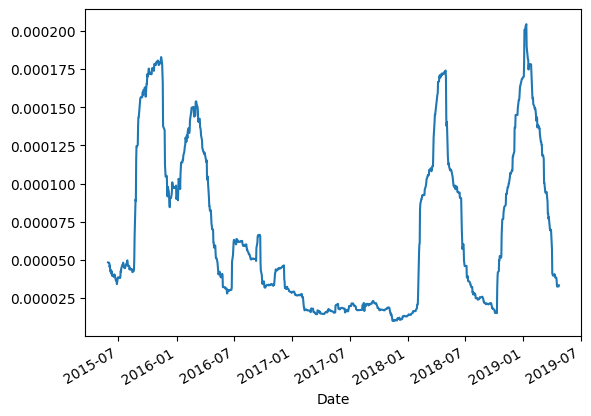

In [52]:
# Calculate and plot Beta
custom_covariance = data_df['Custom'].cov(data_df['S&P 500 Returns'])
custom_variance = data_df['S&P 500 Returns'].var()
custom_beta = custom_covariance / custom_variance

custom_rolling_covariance = data_df['Custom'].rolling(window=60).cov(data_df['S&P 500 Returns'])

custom_rolling_covariance.plot()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [54]:
# Calculate Annualized Sharpe Ratios
custom_annual_sharpe = (data_df.mean() * 252 / (data_df.std() * np.sqrt(252)))
custom_annual_sharpe

SOROS FUND MANAGEMENT LLC      0.335958
PAULSON & CO.INC.             -0.503435
TIGER GLOBAL MANAGEMENT LLC   -0.101469
BERKSHIRE HATHAWAY INC         0.461783
Algo 1                         1.512726
Algo 2                         0.490650
S&P 500 Returns                0.647826
Custom                         0.748909
dtype: float64

<Axes: >

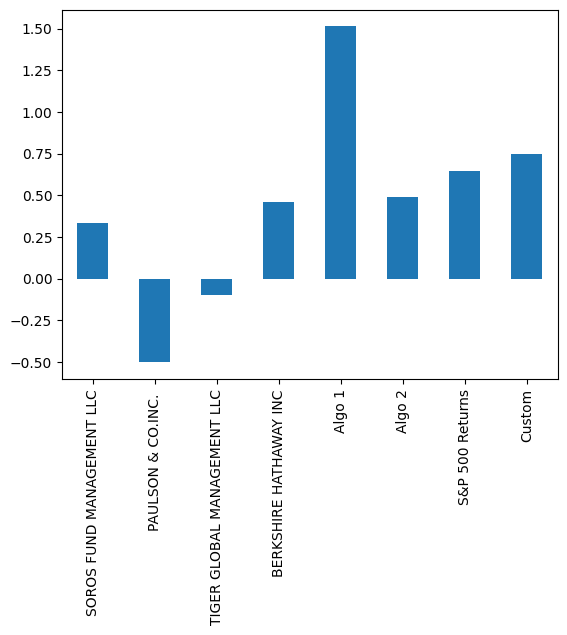

In [55]:
# Visualize the sharpe ratios as a bar plot
custom_annual_sharpe.plot(kind='bar')

### How does your portfolio do?

Write your answer here!

## My portfolio is currently doing better than the S&P 500. 